In [333]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 100
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings('ignore')

# Import and concatenate files

In [334]:
def load_original_data(a,line_header=0):
    df = pd.read_csv(a,header=line_header)
    return df

def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return df

def no_column_space(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df

##def drop_columns(df) :
##    df.drop(columns=['##', '##', '##'], inplace=True)
##    return df

In [335]:
df=load_original_data('Data/Life Expectancy Data.csv') 

df = lower_case_column_names(df)

df = no_column_space(df)
df
##df = drop_columns(df)##

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [336]:
# Import second database for cleaning gdp
df_gdp = load_original_data('Data/GDP_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3159040.csv',2)
df_gdp = lower_case_column_names(df_gdp)
df_gdp = no_column_space(df_gdp)
df_gdp.index =df_gdp['country_name'] # set country as index
df_gdp = df_gdp.drop(columns=['country_name','country_code','indicator_name','indicator_code']) # drop some unesessary columns

In [337]:
df.columns = ('country',
 'year',
 'status',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under_five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv_aids',
 'gdp',
 'population',
 'thinness__1_19_years',
 'thinness_5_9_years',
 'income_composition_of_resources',
 'schooling')

In [338]:
df.head(50)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [339]:
# build function to clean gdp column with new values of 2nd dataframe
# function ignores values of new datafram if value is NaN
def replace_gdp(df_insert_values,df_get_values):
    list_to_replace = []
    country_not_matched = []
    dic_substitutes = {'Bahamas':'Bahamas, The',
                        'Bolivia (Plurinational State of)':'Bolivia',
                        'Congo':'Congo, Rep.',
                        'Czechia':'Czech Republic',
                        'Democratic Republic of the Congo':'Congo, Dem. Rep.',
                        'Egypt':'Egypt, Arab Rep.',
                        'Gambia':'Gambia, The',
                        'Iran (Islamic Republic of)':'Iran, Islamic Rep.',
                        'Kyrgyzstan':'Kyrgyz Republic',
                        "Lao People's Democratic Republic":'Lao PDR',
                        'Micronesia (Federated States of)':  'Micronesia, Fed. Sts.',
                        'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                        'United States of America':'United States',
                        'Venezuela (Bolivarian Republic of)':'Venezuela, RB',
                        'Viet Nam':'Vietnam',
                        'Yemen':'Yemen, Rep.'}
    for row in df_insert_values.index:
        country = df_insert_values.country[row]
        year = str(df_insert_values.year[row])
        if country in df_get_values.index:
            if df_get_values.loc[country,year] and not pd.isnull(df_get_values.loc[country,year]):
                df.loc[row,'gdp'] = df_get_values.loc[country,year]
        else:
            if country not in list_to_replace:
                list_to_replace.append(country)
                if country in dic_substitutes.keys():
                    df.loc[row,'gdp'] = df_get_values.loc[dic_substitutes[country],year]
                else:
                    country_not_matched.append(country)
    return country_not_matched

In [340]:
replace_gdp(df,df_gdp)

["Côte d'Ivoire",
 'Cook Islands',
 "Democratic People's Republic of Korea",
 'Niue',
 'Republic of Korea',
 'Republic of Moldova',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Slovakia',
 'Swaziland',
 'The former Yugoslav republic of Macedonia',
 'United Republic of Tanzania']

In [341]:
# check NaN and 0.0 again
pd.DataFrame({"% NaN" : round(df.isna().sum()/len(df),4)*100, "% 0.0" : round(df[df == 0].count(axis=0)/len(df.index)* 100,2)})
#df.describe()

,% NaN,% 0.0
country,0.00,0.00
year,0.00,0.00
status,0.00,0.00
life_expectancy,0.34,0.00
adult_mortality,0.34,0.00
infant_deaths,0.00,28.86
alcohol,6.60,0.00
percentage_expenditure,0.00,20.80
hepatitis_b,18.82,0.00
measles,0.00,33.46


In [342]:
##drop duplicated rows
df.drop_duplicates()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,578.466353,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,613.856505,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,637.165464,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,641.871438,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,591.162798,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,482.998451,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,478.007604,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,530.530446,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,568.386291,12366165.0,1.6,1.7,0.427,9.8


In [343]:
df_mean = df.groupby(['country']).mean().drop('year',axis=1)
df_mean

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
country,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,380.473117,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,3218.939465,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,3753.091752,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,2947.288780,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,12877.007931,NaN,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,10.7500,74.6875,4.998667,68.5000,0.10000,NaN,NaN,1.65000,1.56250,0.726812,12.78750
Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,36.5000,94.9375,5.977333,91.7500,0.14375,2085.101349,NaN,14.92500,15.62500,0.627062,11.51250
Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,51.6250,67.1250,5.005333,72.6250,0.10000,1601.830063,NaN,13.83125,13.75000,0.475500,8.50625


In [344]:
pd.DataFrame({"% NaN" : round(df.isna().sum()/len(df),4)*100, "% 0.0" : round(df[df == 0].count(axis=0)/len(df.index)* 100,2)})

,% NaN,% 0.0
country,0.00,0.00
year,0.00,0.00
status,0.00,0.00
life_expectancy,0.34,0.00
adult_mortality,0.34,0.00
infant_deaths,0.00,28.86
alcohol,6.60,0.00
percentage_expenditure,0.00,20.80
hepatitis_b,18.82,0.00
measles,0.00,33.46


In [345]:
def replace_gdp(df_insert_values,df_get_values):
    list_to_replace = []
    dic_substitutes = {'Bahamas':'Bahamas, The',
                        'Bolivia (Plurinational State of)':'Bolivia',
                        'Congo':'Congo, Rep.',
                        'Czechia':'Czech Republic',
                        'Democratic Republic of the Congo':'Congo, Dem. Rep.',
                        'Egypt':'Egypt, Arab Rep.',
                        'Gambia':'Gambia, The',
                        'Iran (Islamic Republic of)':'Iran, Islamic Rep.',
                        'Kyrgyzstan':'Kyrgyz Republic',
                        "Lao People's Democratic Republic":'Lao PDR',
                        'Micronesia (Federated States of)':  'Micronesia, Fed. Sts.',
                        'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                        'United States of America':'United States',
                        'Venezuela (Bolivarian Republic of)':'Venezuela, RB',
                        'Viet Nam':'Vietnam',
                        'Yemen':'Yemen, Rep.'}
    for row in df_insert_values.index:
        country = df_insert_values.country[row]
        year = str(df_insert_values.year[row])
        if country in df_get_values.index:
            if df_get_values.loc[country,year] and not pd.isnull(df_get_values.loc[country,year]):
                df.loc[row,'gdp'] = df_get_values.loc[country,year]
        else:
            if country not in list_to_replace:
                list_to_replace.append(country)
                if country in dic_substitutes.keys():
                    df.loc[row,'gdp'] = df_get_values.loc[dic_substitutes[country],year]
                
    return

In [346]:
replace_gdp(df,df_gdp)

In [347]:
# calculate mean of income without zero
# replace 0.0-values with mean_income_no_zero
# columns_replace_0 = ['alcohol',]
# columns_drop_columns = ['percentage_expenditure',]
# columns_drop_rows = ['life_expectancy','adult_mortality']

# def replace_0_with_country_mean(df,columns):
#     for column in columns:
#         for row in df.index:
#             if df.loc[row,column] in [np.NaN,0]:
#                 country = df.country[row]
#                 df.loc[row,column] = df_mean.loc[country,column]
            
# def replace_gdp(df_insert_values,df_get_values):
#     list_to_replace = []
#     list_compare = []
#     list_no_match = []
#     not_in_list = True
#     multiple = 0
#     for row in df_insert_values.index:
#         country = df_insert_values.country[row]
#         year = str(df_insert_values.year[row])
#         if country in df_get_values.index:
#             df.loc[row,'gdp'] = df_get_values.loc[country,year]
#         else:
#             if country not in list_to_replace:
#                 list_to_replace.append(country)
#                 country_4_str = country[0:4]
#                 for i in range(len(df_get_values.index)):
#                     not_in_list = True
#                     multiple = 0
#                     if country_4_str == df_get_values.index[i][0:4]:
#                         list_compare.append(df_get_values.index[i])
#                         list_no_match.append('')
#                         not_in_list = False
#                         multiple += 1
#                         continue
#                 if not_in_list:
#                     list_no_match.append(country)
#                     list_compare.append('')
#     df_missmatch = [list_to_replace,list_compare,list_no_match]
#     #df_missmatch = pd.DataFrame({'original':list_to_replace,'replace':list_compare,'missmatch':list_no_match})
                
#     return df_missmatch

# #list(map(lambda x: mean_income_no_zero if x == 0.0 else x, df.income))
# #df.applymap(lambda x,y: x if type(x)!=str else x.lower())

# # Instead of filling in mean replace 0 with last valiable value
# #df.income = df.income.replace(to_replace=0, method='bfill').replace(to_replace=0, method='ffill')

In [348]:
gdp_old

0       578.466353
1       613.856505
2       637.165464
3       641.871438
4       591.162798
           ...    
2933    482.998451
2934    478.007604
2935    530.530446
2936    568.386291
2937    563.057504
Name: gdp, Length: 2938, dtype: float64

In [349]:
replace_gdp(df,df_gdp)
gdp_new = df.gdp
#pd.DataFrame({'gdp_old':gdp_old,'gdp_new' : gdp_new}).head(50)
pd.DataFrame({'country':df.country,'year':df.year,'gdp_old':gdp_old}).head(50)

,country,year,gdp_old
0,Afghanistan,2015,578.466353
1,Afghanistan,2014,613.856505
2,Afghanistan,2013,637.165464
3,Afghanistan,2012,641.871438
4,Afghanistan,2011,591.162798
5,Afghanistan,2010,543.302967
6,Afghanistan,2009,438.076142
7,Afghanistan,2008,364.660679
8,Afghanistan,2007,359.693158
9,Afghanistan,2006,263.733602


In [350]:
df.gdp.head(50)

0      578.466353
1      613.856505
2      637.165464
3      641.871438
4      591.162798
5      543.302967
6      438.076142
7      364.660679
8      359.693158
9      263.733602
10     242.031313
11     211.382074
12     190.683814
13     179.426579
14     117.496980
15     114.560000
16    3952.801215
17    4578.631994
18    4413.060861
19    4247.629984
20    4437.142885
21    4094.350334
22    4114.140114
23    4370.540127
24    3595.037163
25    2972.743265
26    2673.787283
27    2373.579844
28    1846.118813
29    1425.124849
30    1281.659393
31    1126.683318
32    4177.886892
33    5493.056663
34    5499.587331
35    5592.220115
36    5455.679030
37    4480.787439
38    3883.271290
39    4923.630278
40    3950.514260
41    3478.710412
42    3113.095706
43    2610.185422
44    2103.381692
45    1781.827726
46    1740.607066
47    1765.026718
48    4166.979833
49    5408.411700
Name: gdp, dtype: float64

# Plotting for first impression

In [351]:
df.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.160997,0.016969,-0.047876,-0.050929,0.243468,0.209400
life_expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.586425,-0.021538,-0.477183,-0.471584,0.724776,0.751975
adult_mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.379841,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant_deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.134500,0.556801,0.465711,0.471350,-0.145139,-0.193720
alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.414489,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage_expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.687650,-0.025662,-0.251369,-0.252905,0.381952,0.389687
hepatitis_b,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.120435,-0.123321,-0.120429,-0.124960,0.199549,0.231117
measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.098708,0.265966,0.224808,0.221072,-0.129568,-0.137225
bmi,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.361689,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under_five_deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.138815,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [352]:
#df.style.background_gradient(cmap='Blues')


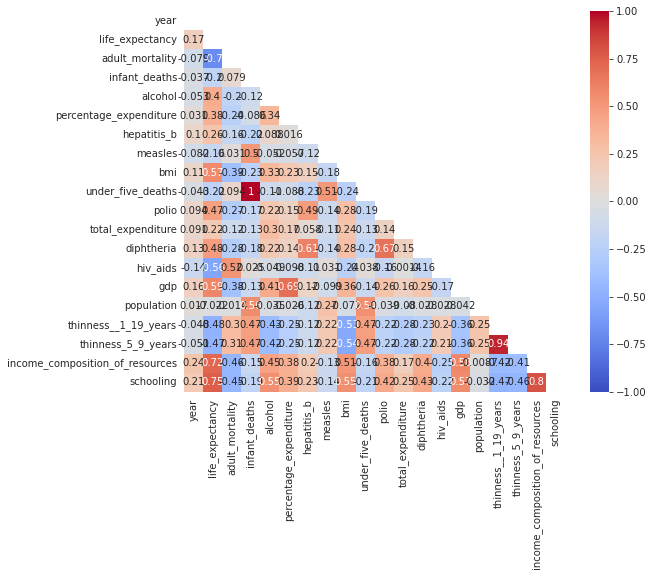

In [353]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Clean the NaN 


In [354]:
df.columns[df.isna().any()].tolist()

['life_expectancy',
 'adult_mortality',
 'alcohol',
 'hepatitis_b',
 'bmi',
 'polio',
 'total_expenditure',
 'diphtheria',
 'gdp',
 'population',
 'thinness__1_19_years',
 'thinness_5_9_years',
 'income_composition_of_resources',
 'schooling']

## Clean the life_expectancy


In [355]:
df.fillna(df.mean(), inplace=True)

In [356]:
df_life_expectancy_clean = df[df['life_expectancy'].isnull()]
df_life_expectancy_clean 
## Should not drop life_expectancy because it is a independant variable. 
## And the number of NaN values at this columns is not significant.

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling


## Clean adult_mortality. 
The adult mortality rate shown in the World Development Indicators (WDI) database and related products refers to 
the probability that those who have reached age 15 will die before reaching age 60 (shown per 1,000 persons). 
In other words, a value of 150 means that out of 1,000 persons who have reached age 15, 150 are expected to 
die before reaching age 60, and 850 are expected to survive to age 60. This is based on a “synthetic cohort”: 
current life-table mortality rates are applied to the current cohort of 15 year olds, assuming no changes in mortality.

In [357]:
df[df['adult_mortality'].isnull()]
## Same case as life expectancy.

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling


## Clean alcohol

In [358]:
df[df['alcohol'].isnull()]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling


# Get the numeric and categoric

In [359]:
numericals_features =df._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,578.466353,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,613.856505,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,637.165464,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,641.871438,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,591.162798,2978599.0,18.2,18.2,0.454,9.5


In [360]:
numericals_features_scaled=StandardScaler().fit_transform(numericals_features)
numericals_features_scaled = pd.DataFrame(numericals_features_scaled, index= numericals_features.index, columns= numericals_features.columns)


In [361]:
## Get Categorical data

categoricals_features = df.select_dtypes(object)

# get dummies pandas
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

In [362]:
numericals_features_scaled

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,1.621762,-0.444448,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,0.255359,-3.278638,0.925806,-0.732952,-0.323445,-0.655689,0.389975,2.813130,2.773279,-0.725401,-0.579931
1,1.404986,-0.980950,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,0.274060,-1.051482,0.934140,-0.859877,-0.323445,-0.653508,-0.230936,2.881408,2.817902,-0.740050,-0.610570
2,1.188210,-0.980950,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,0.292761,-0.880163,0.913306,-0.775260,-0.323445,-0.652071,0.352715,2.926927,2.862526,-0.769349,-0.641209
3,0.971434,-1.023029,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,0.317696,-0.666013,1.075815,-0.648335,-0.323445,-0.651781,-0.168315,2.972446,2.929461,-0.803531,-0.671847
4,0.754658,-1.054587,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,0.342631,-0.623183,0.804966,-0.606027,-0.323445,-0.654907,-0.181666,3.040724,2.974085,-0.847480,-0.763764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762774,-2.622015,4.499494,-0.028022,-0.062024,-0.371433,-0.573018,-0.208332,-0.563194,-0.000223,-0.666013,0.496616,-0.732952,6.275044,-0.661574,0.000449,1.037896,1.010651,-1.076989,-0.855681
2934,-0.979550,-2.600976,4.435009,-0.036503,-0.138640,-0.371433,-3.274163,-0.123991,-0.583270,-0.006456,-3.235808,0.242435,-0.606027,6.885650,-0.661881,-0.002221,1.128934,1.122210,-1.023274,-0.763764
2935,-1.196326,-2.569417,-0.739941,-0.044984,-0.044146,-0.371433,-0.351612,-0.184521,-0.603346,-0.012690,-0.409034,0.246602,-0.479102,7.496256,-0.658644,-0.234691,-0.828375,-0.796600,-0.979326,-0.610570
2936,-1.413102,-2.516818,4.201249,-0.044984,-0.736246,-0.371433,-0.218769,-0.164897,-0.623422,-0.018924,-0.280544,0.092426,-0.309869,7.949287,-0.656311,-0.007196,-0.737337,-0.707353,-0.979326,-0.671847


In [363]:
categoricals_features

,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cabo Verde,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Cook Islands,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czechia,country_Côte d'Ivoire,country_Democratic People's Republic of Korea,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Grenada,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran (Islamic Republic of),country_Iraq,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kuwait,country_Kyrgyzstan,country_Lao People's Democratic Republic,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Marshall Islands,country_Mauritania,country_Mauritius,country_Mexico,country_Micronesia (Federated States of),country_Monaco,country_Mongolia,country_Montenegro,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Niue,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Republic of Korea,country_Republic of Moldova,country_Romania,country_Russian Federation,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and the Grenadines,country_Samoa,country_San Marino,country_Sao Tome and Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe,status_Developing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [364]:
all_features=pd.concat([numericals_features_scaled, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features = all_features.reset_index()
type(all_features)

pandas.core.frame.DataFrame

In [365]:
x=numericals_features_scaled.drop(['life_expectancy'], axis=1)
y=numericals_features_scaled.life_expectancy

In [366]:
x

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,1.621762,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,0.255359,-3.278638,0.925806,-0.732952,-0.323445,-0.655689,0.389975,2.813130,2.773279,-0.725401,-0.579931
1,1.404986,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,0.274060,-1.051482,0.934140,-0.859877,-0.323445,-0.653508,-0.230936,2.881408,2.817902,-0.740050,-0.610570
2,1.188210,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,0.292761,-0.880163,0.913306,-0.775260,-0.323445,-0.652071,0.352715,2.926927,2.862526,-0.769349,-0.641209
3,0.971434,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,0.317696,-0.666013,1.075815,-0.648335,-0.323445,-0.651781,-0.168315,2.972446,2.929461,-0.803531,-0.671847
4,0.754658,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,0.342631,-0.623183,0.804966,-0.606027,-0.323445,-0.654907,-0.181666,3.040724,2.974085,-0.847480,-0.763764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762774,4.499494,-0.028022,-0.062024,-0.371433,-0.573018,-0.208332,-0.563194,-0.000223,-0.666013,0.496616,-0.732952,6.275044,-0.661574,0.000449,1.037896,1.010651,-1.076989,-0.855681
2934,-0.979550,4.435009,-0.036503,-0.138640,-0.371433,-3.274163,-0.123991,-0.583270,-0.006456,-3.235808,0.242435,-0.606027,6.885650,-0.661881,-0.002221,1.128934,1.122210,-1.023274,-0.763764
2935,-1.196326,-0.739941,-0.044984,-0.044146,-0.371433,-0.351612,-0.184521,-0.603346,-0.012690,-0.409034,0.246602,-0.479102,7.496256,-0.658644,-0.234691,-0.828375,-0.796600,-0.979326,-0.610570
2936,-1.413102,4.201249,-0.044984,-0.736246,-0.371433,-0.218769,-0.164897,-0.623422,-0.018924,-0.280544,0.092426,-0.309869,7.949287,-0.656311,-0.007196,-0.737337,-0.707353,-0.979326,-0.671847


In [367]:
y

0      -0.444448
1      -0.980950
2      -0.980950
3      -1.023029
4      -1.054587
          ...   
2933   -2.622015
2934   -2.600976
2935   -2.569417
2936   -2.516818
2937   -2.443181
Name: life_expectancy, Length: 2938, dtype: float64

In [368]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=.20)

In [369]:
model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train

LinearRegression()

In [370]:
y_pred=model.predict(X_test.to_numpy())   # model prediction


y_pred_train=model.predict(X_train.to_numpy())

Text(0.5, 1.0, 'Train Residual histogram')

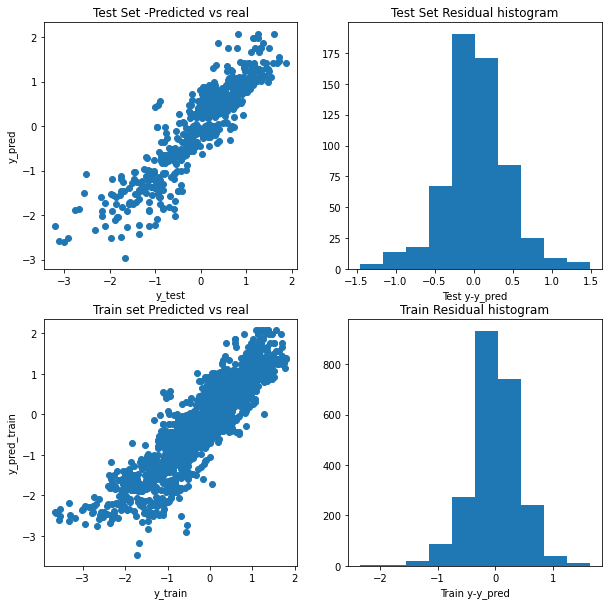

In [371]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

In [372]:
train_mse=mse(y_train,model.predict(X_train.to_numpy()))
test_mse=mse(y_test,model.predict(X_test.to_numpy()))

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 0.17888405166879257 -- test MSE: 0.17332859995869687


In [373]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 0.4229468662477505 -- test RMSE: 0.41632751525535383


In [374]:
train_mae=mae(y_train,model.predict(X_train.to_numpy()))
test_mae=mae(y_test,model.predict(X_test.to_numpy()))

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 0.17888405166879257 -- test MAE: 0.17332859995869687


In [375]:
r2= model.score(X_test.to_numpy(), y_test)
print (r2)

print(r2_score(y_test,model.predict(X_test.to_numpy())))

0.8248090615397867
0.8248090615397867


In [376]:
N=X_train.shape[0]
p=36
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.8220823543263982


In [377]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const) 

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const) 
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     564.6
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:54:46   Log-Likelihood:                -1312.3
No. Observations:                2350   AIC:                             2665.
Df Residuals:                    2330   BIC:                             2780.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     